The dataset originally has 330 features (columns) but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean BRFSS data into a useable format for machine learning alogrithms.

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )

**About Columns :**
Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
Orginal_data = pd.read_csv("../input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

data = pd.read_csv("../input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [3]:
data.shape 

(253680, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [6]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [8]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

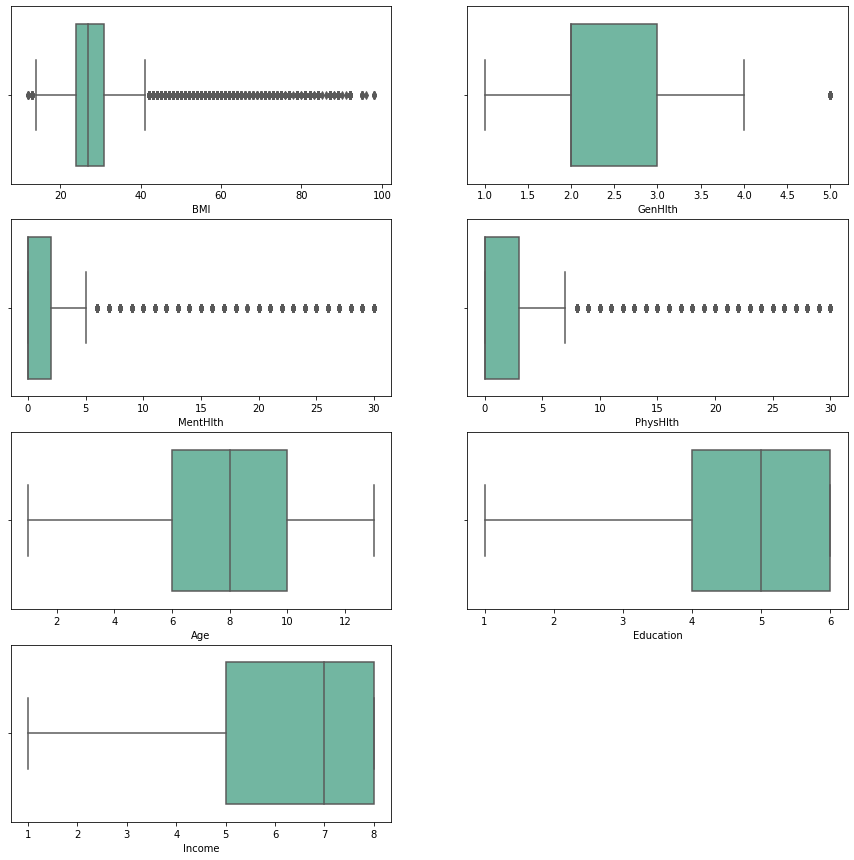

In [9]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [10]:
data.duplicated().sum()

24206

In [11]:
data.drop_duplicates(inplace = True)
print(data.duplicated().sum())

print(data.shape)

0
(229474, 22)


In [12]:
data2 = data.copy() 

cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']


# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

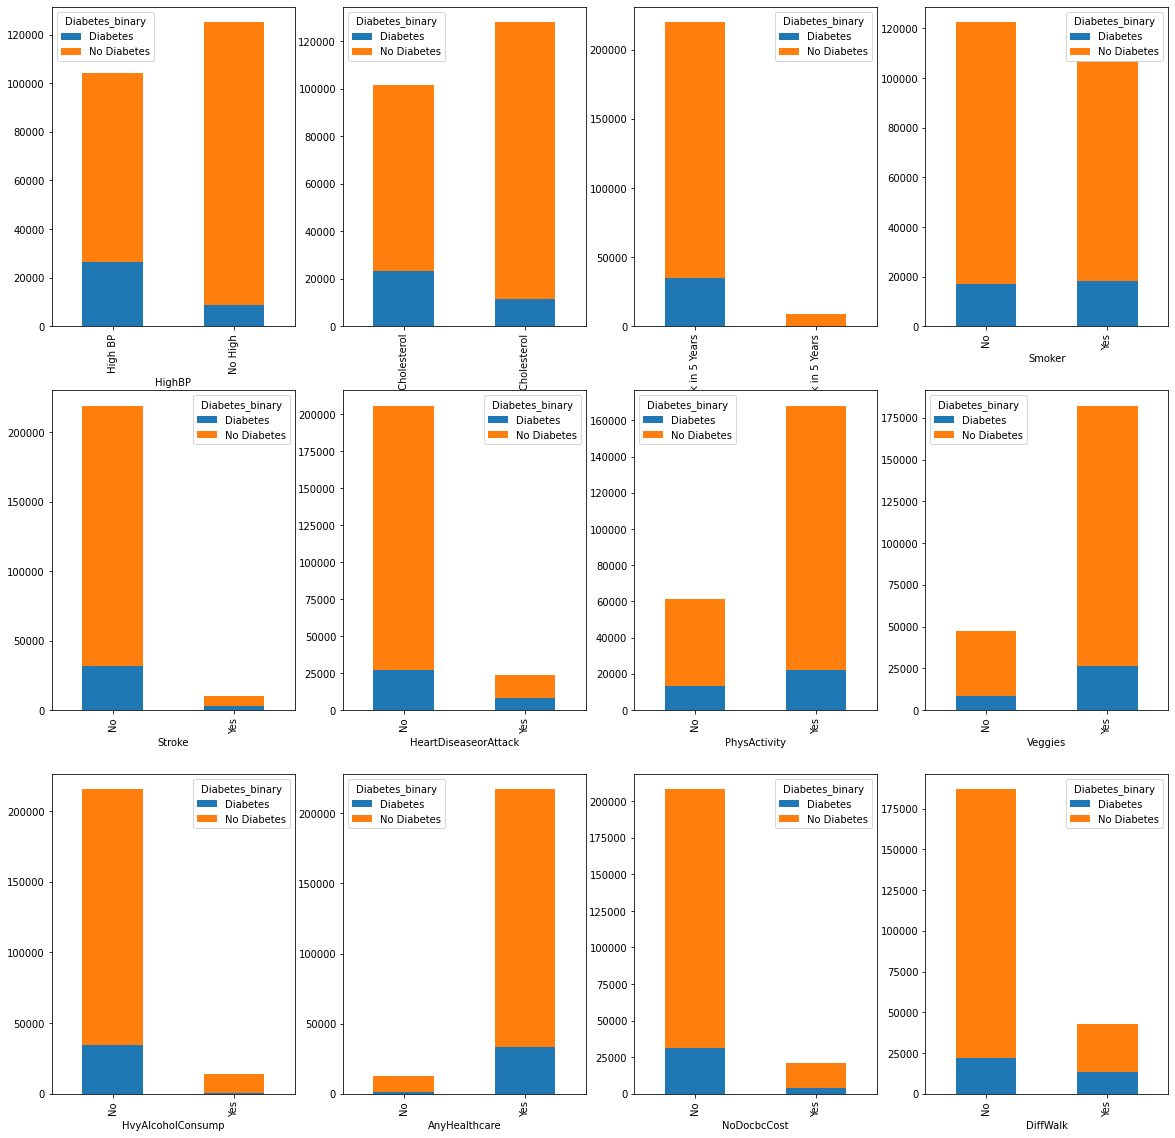

In [13]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot


fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()
c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

In [14]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

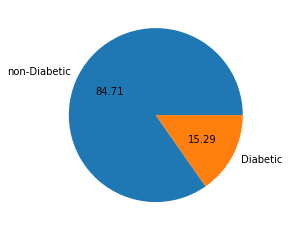

In [15]:
labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

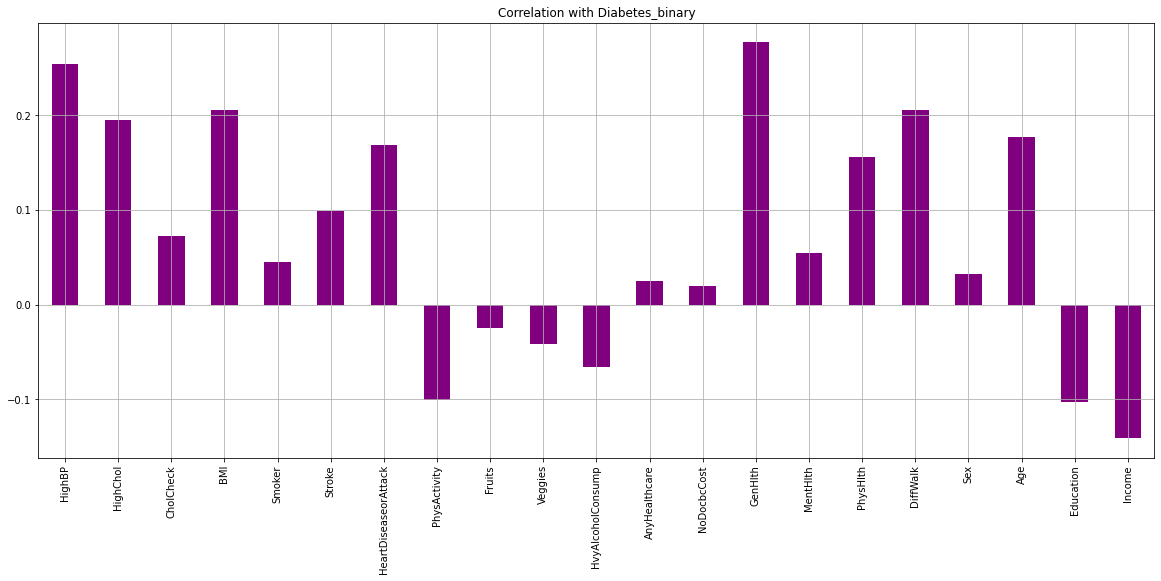

In [16]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

**Diabetes_binary's relation with other columns Through bar Graph Result:**

Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

In [17]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


In [18]:
Orginal_data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [19]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [20]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [21]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [22]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Income"]

data.drop(colomns , axis= 1 ,inplace=True)

In [23]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [24]:
Y.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [25]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

print(y_sm.shape , x_sm.shape)

(70194,) (70194, 15)


In [26]:
y_sm.value_counts()

0    35097
1    35097
Name: Diabetes_binary, dtype: int64

In [27]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [29]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(X_train , Y_train)

# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8370
Test set score: 0.8332


In [30]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.16682099864662725
Root Mean Squared Error : 0.4084372640279377


              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7012
           1       0.91      0.74      0.82      7027

    accuracy                           0.83     14039
   macro avg       0.85      0.83      0.83     14039
weighted avg       0.85      0.83      0.83     14039



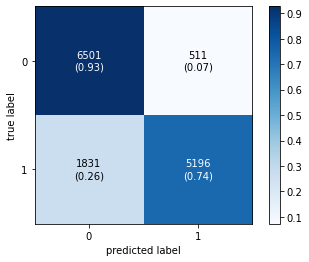

In [31]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [32]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8594
Test set score: 0.8499


In [33]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = Y_test
pred_df['Predicted values'] = y_pred
pred_df

,True values,Predicted values
13099,0,0
32607,0,0
69261,1,1
59548,1,1
21659,0,0
...,...,...
6631,0,0
33315,0,0
32555,0,0
1138,0,0


In [34]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.15008191466628676
Root Mean Squared Error : 0.3874040715664805


              precision    recall  f1-score   support

           0       0.79      0.96      0.86      7012
           1       0.94      0.74      0.83      7027

    accuracy                           0.85     14039
   macro avg       0.87      0.85      0.85     14039
weighted avg       0.87      0.85      0.85     14039



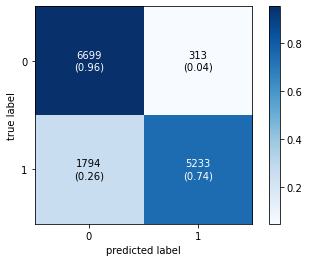

In [35]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [36]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8624
Test set score: 0.8568


In [37]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = Y_test
pred_df['Predicted values'] = y_pred
pred_df

,True values,Predicted values
13099,0,0
32607,0,0
69261,1,1
59548,1,1
21659,0,0
...,...,...
6631,0,0
33315,0,0
32555,0,0
1138,0,0


In [38]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1432438207849562
Root Mean Squared Error : 0.378475654150906


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7012
           1       0.94      0.76      0.84      7027

    accuracy                           0.86     14039
   macro avg       0.87      0.86      0.86     14039
weighted avg       0.87      0.86      0.86     14039



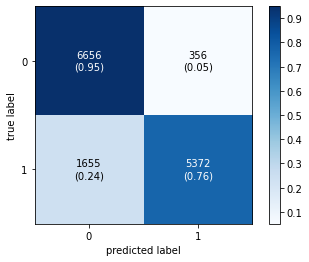

In [39]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [40]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8569
Test set score: 0.8538


In [41]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = Y_test
pred_df['Predicted values'] = y_pred
pred_df

,True values,Predicted values
13099,0,0
32607,0,0
69261,1,1
59548,1,1
21659,0,0
...,...,...
6631,0,0
33315,0,0
32555,0,0
1138,0,0


In [42]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14623548685803833
Root Mean Squared Error : 0.3824074879732853


              precision    recall  f1-score   support

           0       0.79      0.95      0.87      7012
           1       0.94      0.75      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.87      0.85      0.85     14039
weighted avg       0.87      0.85      0.85     14039



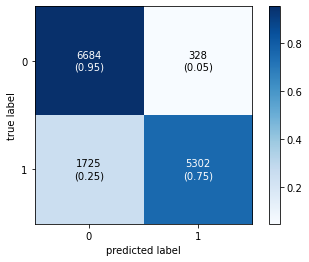

In [43]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [44]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8676
Test set score: 0.8581


In [45]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = Y_test
pred_df['Predicted values'] = y_pred
pred_df

,True values,Predicted values
13099,0,0
32607,0,0
69261,1,1
59548,1,1
21659,0,0
...,...,...
6631,0,0
33315,0,0
32555,0,0
1138,0,0


In [46]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14189044803760953
Root Mean Squared Error : 0.37668348522016404


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7012
           1       0.93      0.78      0.85      7027

    accuracy                           0.86     14039
   macro avg       0.87      0.86      0.86     14039
weighted avg       0.87      0.86      0.86     14039



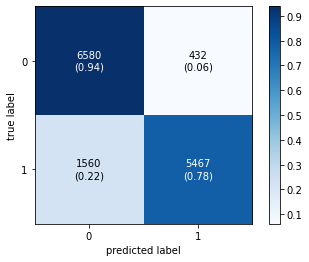

In [47]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()